Let's conduct a Comprehensive EDA on our Diabetes Prediction Dataset based on the Advanced EDA Task mentioned. The analysis will include data quality checks, statistical summaries, visualizations, and insights. Let's start by examining the dataset.

---
Visualizing a dataset is important because it allows you to quickly identify patterns, trends, and outliers in your data that might be difficult to see in raw form, leading to a deeper understanding of the information and enabling better decision-making by making complex data more accessible and interpretable for a wider audience, including non-technical users.


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


(None,
    gender   age  hypertension  heart_disease smoking_history    bmi  \
 0  Female  80.0             0              1           never  25.19   
 1  Female  54.0             0              0         No Info  27.32   
 2    Male  28.0             0              0           never  27.32   
 3  Female  36.0             0              0         current  23.45   
 4    Male  76.0             1              1         current  20.14   
 
    HbA1c_level  blood_glucose_level  diabetes  
 0          6.6                  140         0  
 1          6.6                   80         0  
 2          5.7                  158         0  
 3          5.0                  155         0  
 4          4.8                  155         0  )

**Initial Observations:**


---


The dataset has 100,000 records and 9 columns.
There are no missing values in any column.


---


**Column Types:**
<br>
**Categorical:** gender, smoking_history<br>
**Binary (0/1):** hypertension, heart_disease, diabetes<br>
**Numerical:** age, bmi, HbA1c_level, blood_glucose_level<br>
Next, we will analyze data quality, distributions, and relationships using advanced visualizations.

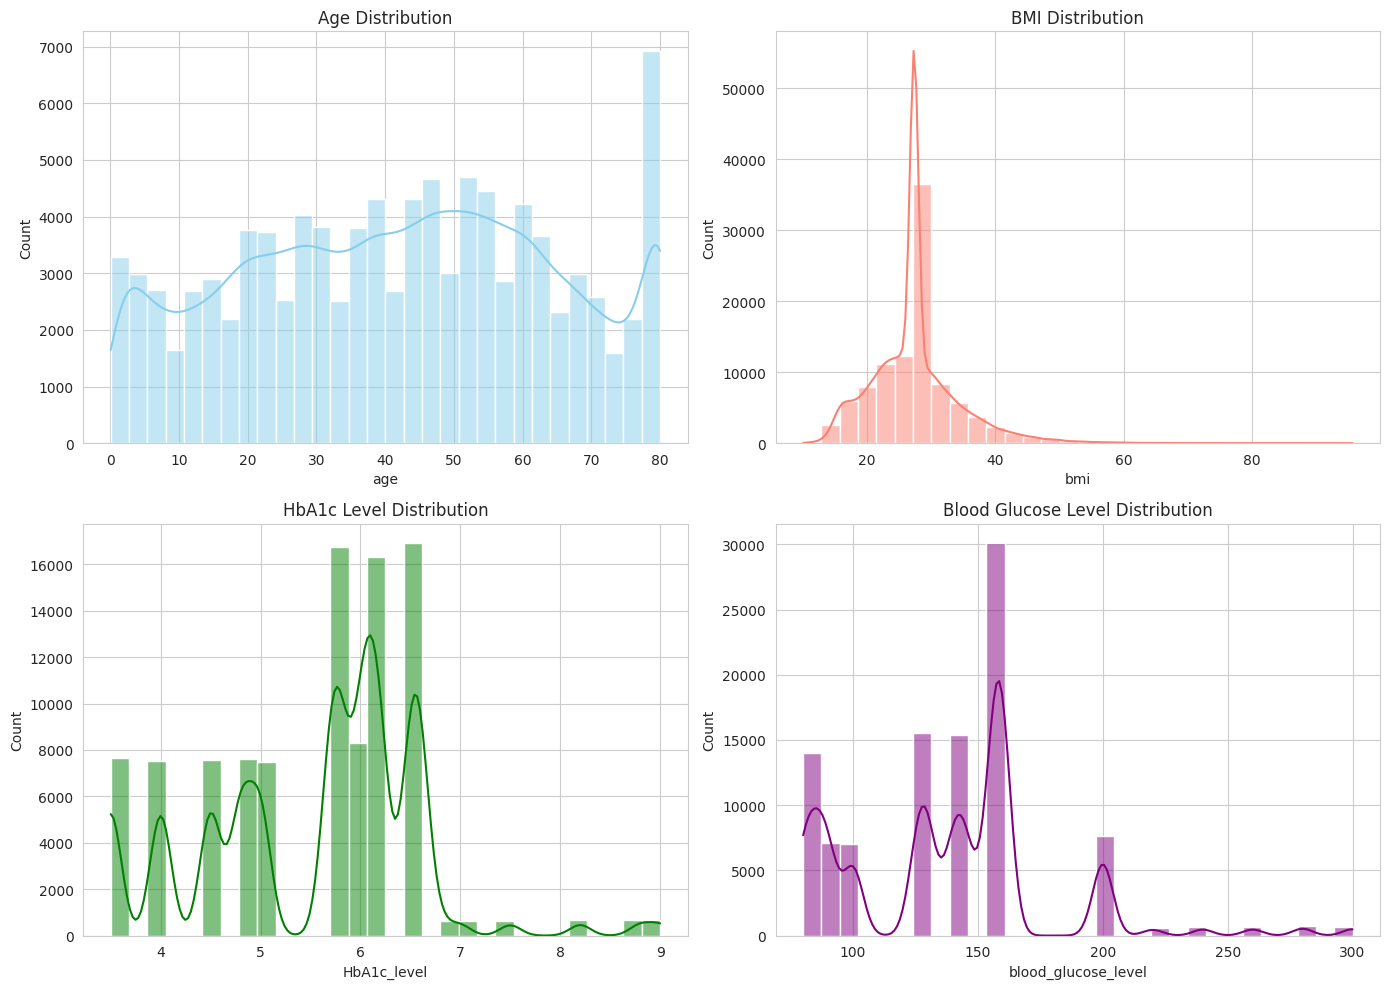

In [ ]:
# Import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age Distribution
sns.histplot(df["age"], bins=30, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

# BMI Distribution
sns.histplot(df["bmi"], bins=30, kde=True, color="salmon", ax=axes[0, 1])
axes[0, 1].set_title("BMI Distribution")

# HbA1c Level Distribution
sns.histplot(df["HbA1c_level"], bins=30, kde=True, color="green", ax=axes[1, 0])
axes[1, 0].set_title("HbA1c Level Distribution")

# Blood Glucose Level Distribution
sns.histplot(df["blood_glucose_level"], bins=30, kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Blood Glucose Level Distribution")

plt.tight_layout()
plt.show()


**Key Insights from Univariate Analysis:**


---


**Age Distribution:** The dataset covers a wide range of ages, with a noticeable peak in the middle-aged and older population.<br>
**BMI Distribution:** The values seem normally distributed but may have outliers on the higher end.<br>
**HbA1c Level Distribution:** Most values are concentrated in the lower range, but we need to check for high-risk groups.<br>
**Blood Glucose Level Distribution:** There appears to be a long tail, possibly indicating extreme values.<br>
Next, we analyze the class balance of the diabetes variable and check for categorical feature distributions. ​

<ipython-input-4-8289199a53a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["diabetes"], palette=["#ff9999", "#66b3ff"])


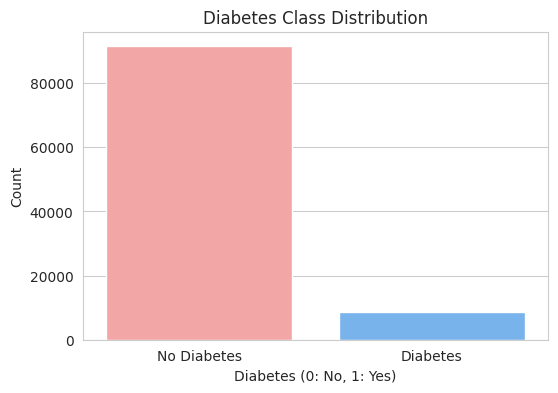

<ipython-input-4-8289199a53a0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["gender"], palette="coolwarm", ax=axes[0])
<ipython-input-4-8289199a53a0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["smoking_history"], palette="viridis", ax=axes[1])


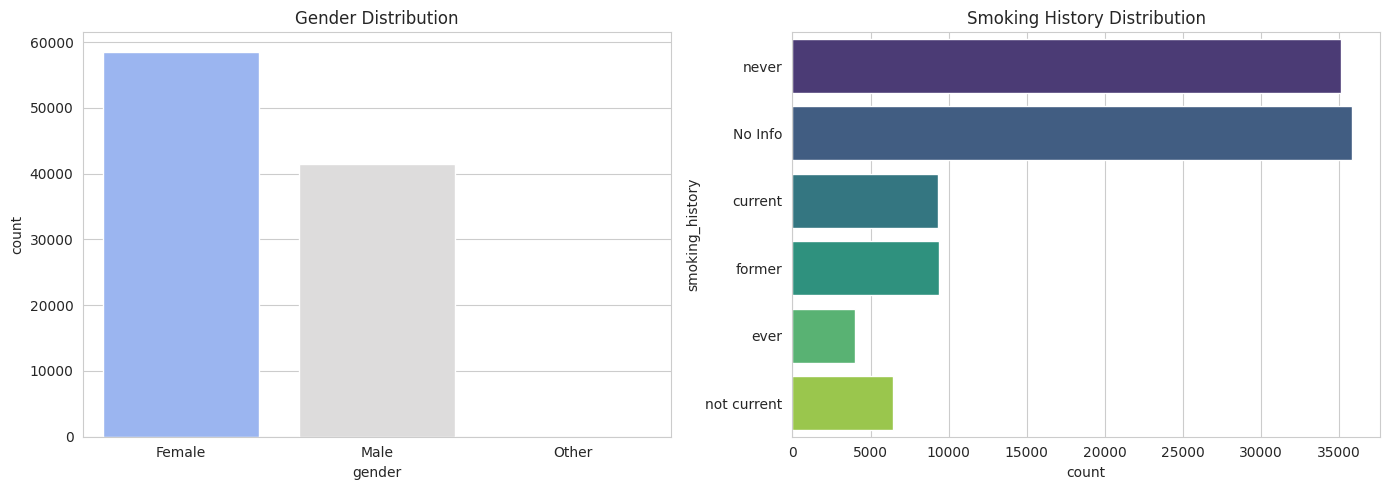

In [ ]:
# Plot class distribution of the target variable (diabetes)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["diabetes"], palette=["#ff9999", "#66b3ff"])
plt.title("Diabetes Class Distribution")
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.show()

# Plot categorical distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender Distribution
sns.countplot(x=df["gender"], palette="coolwarm", ax=axes[0])
axes[0].set_title("Gender Distribution")

# Smoking History Distribution
sns.countplot(y=df["smoking_history"], palette="viridis", ax=axes[1])
axes[1].set_title("Smoking History Distribution")

plt.tight_layout()
plt.show()


**Key Insights from Categorical Data Analysis:**


---


**Diabetes Class Imbalance:** The dataset has more non-diabetic cases than diabetic ones, which may require balancing techniques for predictive modeling.<br>
**Gender Distribution:** The dataset is dominated by Female and Male categories, with a small "Other" category.<br>
**Smoking History:** Most individuals have either never smoked or have "No Info" about their smoking history. This missing context should be handled appropriately.<br>
Next, we conduct bivariate and multivariate analysis to explore feature relationships.


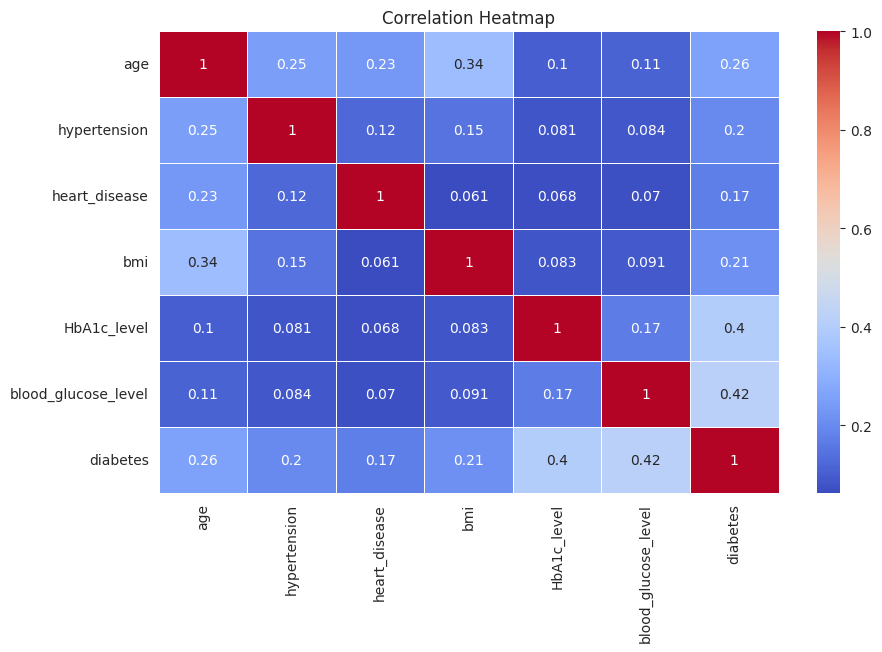

In [ ]:
# Plot correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-7-424c9835d1ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["diabetes"], y=df["age"], palette="coolwarm", ax=axes[0])
<ipython-input-7-424c9835d1ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["diabetes"], y=df["bmi"], palette="coolwarm", ax=axes[1])


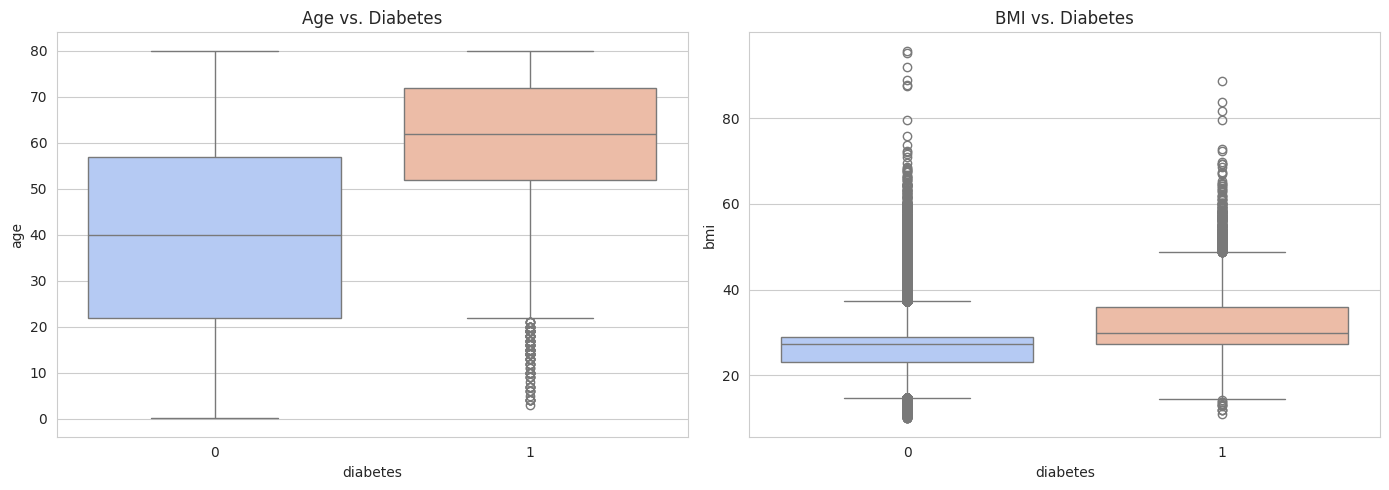

In [ ]:
# Bivariate Analysis: Age vs. Diabetes & BMI vs. Diabetes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create a new figure and axes

# Age vs. Diabetes
sns.boxplot(x=df["diabetes"], y=df["age"], palette="coolwarm", ax=axes[0])
axes[0].set_title("Age vs. Diabetes")

# BMI vs. Diabetes
sns.boxplot(x=df["diabetes"], y=df["bmi"], palette="coolwarm", ax=axes[1])
axes[1].set_title("BMI vs. Diabetes")

plt.tight_layout()
plt.show()

**Key Insights from Bivariate Analysis:**


---


**Correlation Matrix:**

- **HbA1c_level and blood_glucose_level** show strong positive correlation.<br>
- **Age** has a moderate correlation with diabetes, meaning older individuals may have a higher risk.<br>
- **BMI and diabetes** show a weak correlation, but BMI might still be an important factor.<br>


**Age vs. Diabetes:**

- Older individuals have a higher median age in the diabetic group.<br>


**BMI vs. Diabetes:**

- The BMI distribution is slightly higher in diabetic individuals, but there's significant overlap.<br>


Next, we analyze comorbidities (hypertension & heart disease) with diabetes and explore gender-based health disparities.


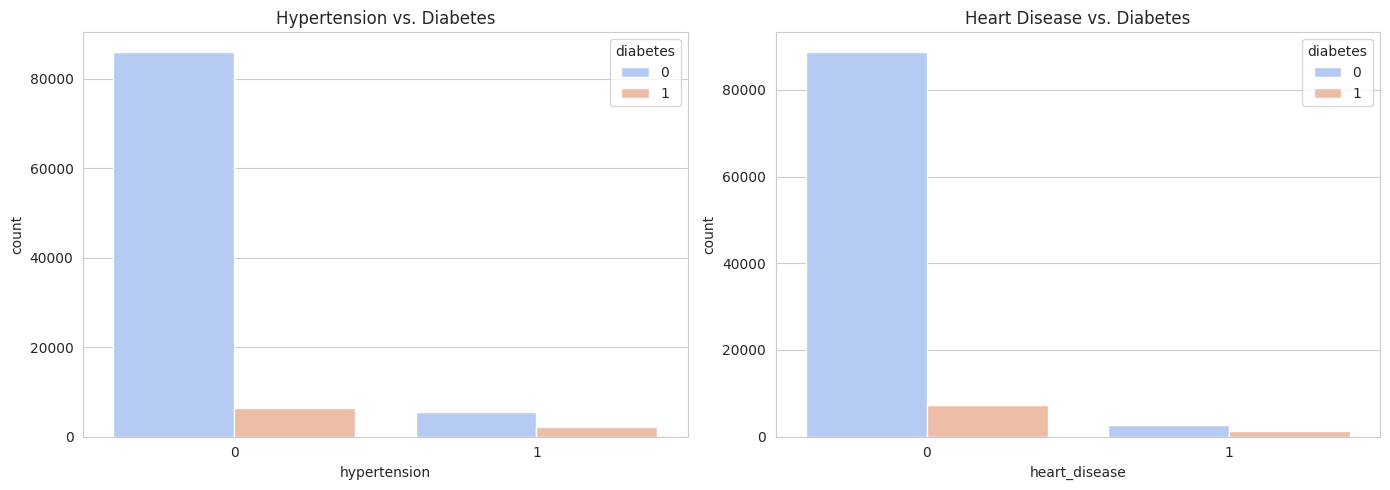

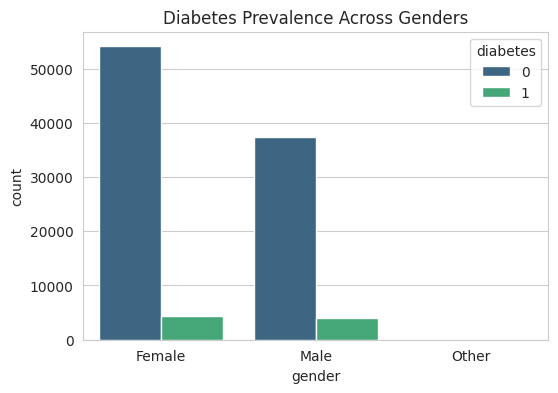

In [ ]:
# Analyze the co-occurrence of hypertension & heart disease with diabetes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hypertension vs. Diabetes
sns.countplot(x=df["hypertension"], hue=df["diabetes"], palette="coolwarm", ax=axes[0])
axes[0].set_title("Hypertension vs. Diabetes")

# Heart Disease vs. Diabetes
sns.countplot(x=df["heart_disease"], hue=df["diabetes"], palette="coolwarm", ax=axes[1])
axes[1].set_title("Heart Disease vs. Diabetes")

plt.tight_layout()
plt.show()

# Analyze Gender-based Diabetes Prevalence
plt.figure(figsize=(6, 4))
sns.countplot(x=df["gender"], hue=df["diabetes"], palette="viridis")
plt.title("Diabetes Prevalence Across Genders")
plt.show()


Certainly! Here's your comorbidity and gender analysis in Google Colab text format:

**Key Insights from Comorbidity and Gender Analysis:**


---


**Hypertension & Diabetes:** Individuals with hypertension are more likely to be diabetic.<br>


**Heart Disease & Diabetes:** A significant portion of diabetic individuals also have heart disease, highlighting an important risk factor.<br>


**Gender & Diabetes:** The female category has a higher number of diabetic individuals, but further statistical tests are needed to confirm significance.<br>


Next, we conduct anomaly detection and risk stratification by identifying extreme health indicators.

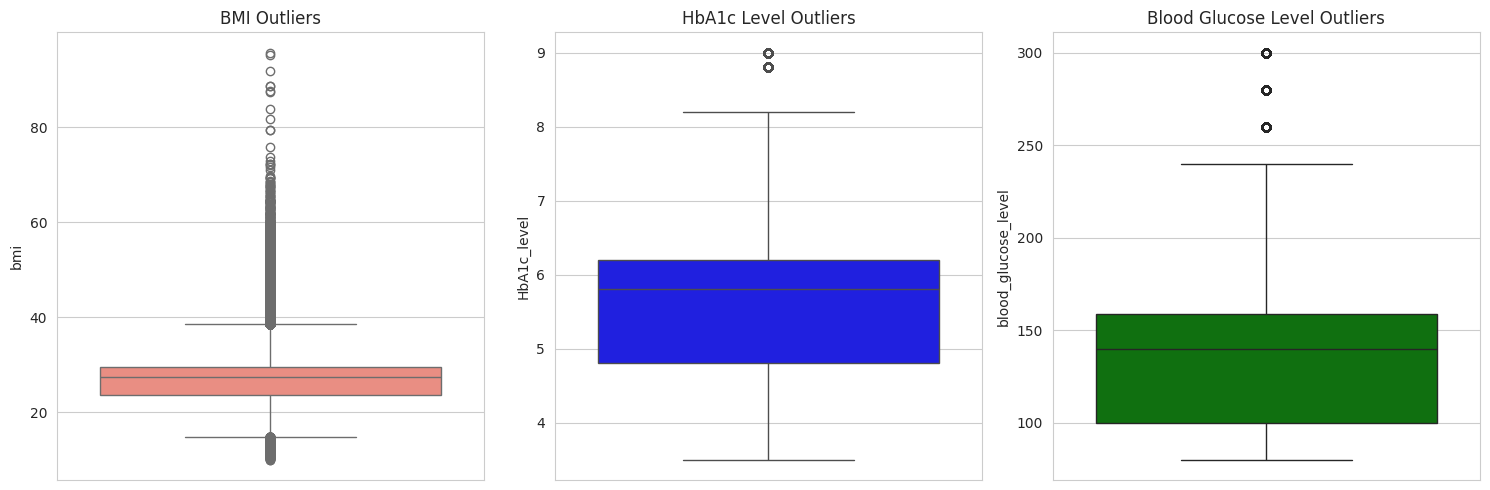

(1000, 654, 674)

In [ ]:
# Detecting anomalies using boxplots for key health indicators
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# BMI Outliers
sns.boxplot(y=df["bmi"], color="salmon", ax=axes[0])
axes[0].set_title("BMI Outliers")

# HbA1c Level Outliers
sns.boxplot(y=df["HbA1c_level"], color="blue", ax=axes[1])
axes[1].set_title("HbA1c Level Outliers")

# Blood Glucose Level Outliers
sns.boxplot(y=df["blood_glucose_level"], color="green", ax=axes[2])
axes[2].set_title("Blood Glucose Level Outliers")

plt.tight_layout()
plt.show()

# Identify extreme values
bmi_outliers = df[df["bmi"] > df["bmi"].quantile(0.99)]
hba1c_outliers = df[df["HbA1c_level"] > df["HbA1c_level"].quantile(0.99)]
glucose_outliers = df[df["blood_glucose_level"] > df["blood_glucose_level"].quantile(0.99)]

len(bmi_outliers), len(hba1c_outliers), len(glucose_outliers)


Sure! Here's your anomaly detection analysis in Google Colab text format:

**Key Insights from Anomaly Detection:**


---


**BMI Outliers:** Around 1,000 individuals have extremely high BMI values, indicating potential obesity-related risks.<br>


**HbA1c Level Outliers:** 654 individuals have very high HbA1c levels, suggesting uncontrolled diabetes.<br>


**Blood Glucose Level Outliers:** 674 individuals show extremely high blood glucose levels, reinforcing the need for risk classification.<br>


Next, we created risk profiles by categorizing age and BMI groups.


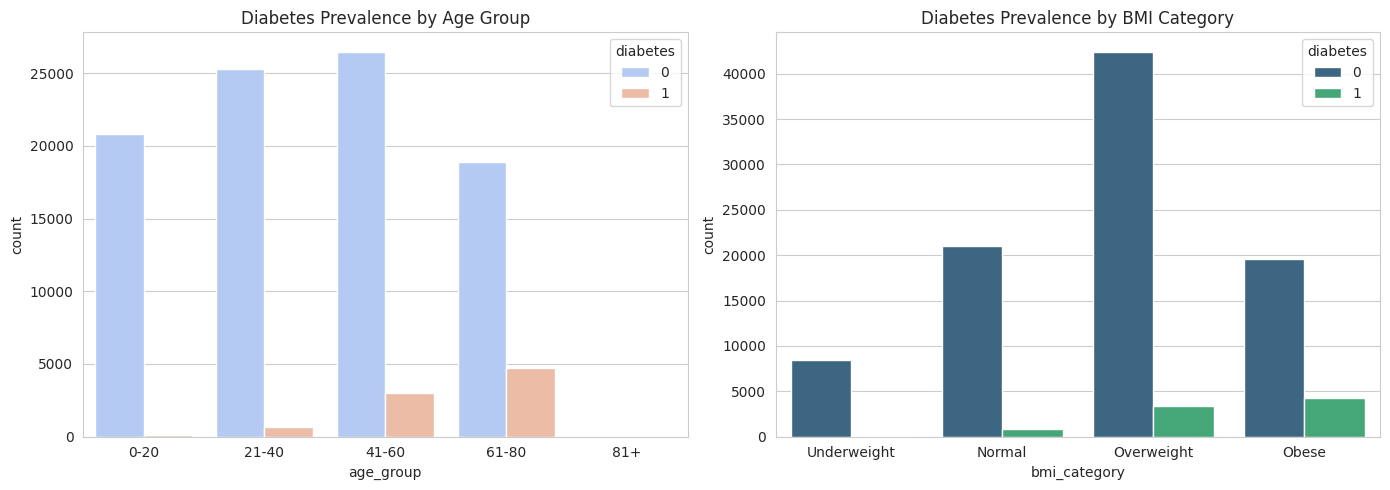

In [ ]:
# Create Age Groups
df["age_group"] = pd.cut(df["age"], bins=[0, 20, 40, 60, 80, 100], labels=["0-20", "21-40", "41-60", "61-80", "81+"])

# Categorize BMI
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese"])

# Visualize Diabetes Prevalence by Age Group and BMI Category
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age Group vs. Diabetes
sns.countplot(x=df["age_group"], hue=df["diabetes"], palette="coolwarm", ax=axes[0])
axes[0].set_title("Diabetes Prevalence by Age Group")

# BMI Category vs. Diabetes
sns.countplot(x=df["bmi_category"], hue=df["diabetes"], palette="viridis", ax=axes[1])
axes[1].set_title("Diabetes Prevalence by BMI Category")

plt.tight_layout()
plt.show()


**Key Insights from Risk Stratification:**


---


**Age Group & Diabetes Risk:**

- Diabetes prevalence is significantly higher in older age groups (61-80 and 81+ years).<br>


**BMI & Diabetes Risk:**

- Obese individuals have a higher proportion of diabetes cases.<br>
- Underweight individuals have the least diabetes cases, reinforcing the importance of weight management.

**This EDA has highlighted important risk factors for diabetes and proposed feature engineering techniques for improving predictive modeling. By addressing data imbalance, handling outliers, and incorporating new features, we can build a more robust diabetes prediction model.**